In [ ]:
"""
Backtesting Strategy: Moving Average Crossover

Objective:
This code implements and backtests a simple trading strategy based on moving average crossovers.
The strategy involves:
1. Using a 50-day simple moving average (SMA) as the short-term indicator.
2. Using a 200-day simple moving average (SMA) as the long-term indicator.
3. Generating buy/sell signals based on the crossover of these SMAs.
   - Buy Signal: When SMA_50 > SMA_200
   - Sell Signal: When SMA_50 <= SMA_200
4. Backtesting the strategy by calculating cumulative returns and comparing them with a buy-and-hold approach.

Key Steps:
1. Download historical stock data using the yfinance library.
2. Calculate 50-day and 200-day SMAs.
3. Generate trading signals based on the SMA crossover.
4. Calculate daily returns for both the strategy and the market (buy-and-hold).
5. Compute cumulative returns for both and visualize the results.
6. Analyze strategy performance.

Optional Enhancements:
- Add additional technical indicators such as RSI, Bollinger Bands, or MACD for more sophisticated signals.
- Implement portfolio-level backtesting using optimized weights from the portfolio optimization step.
- Include performance metrics such as Sharpe ratio, maximum drawdown, and win rate.
- Test the strategy on multiple stocks or ETFs for robustness.
"""


[*********************100%***********************]  1 of 1 completed


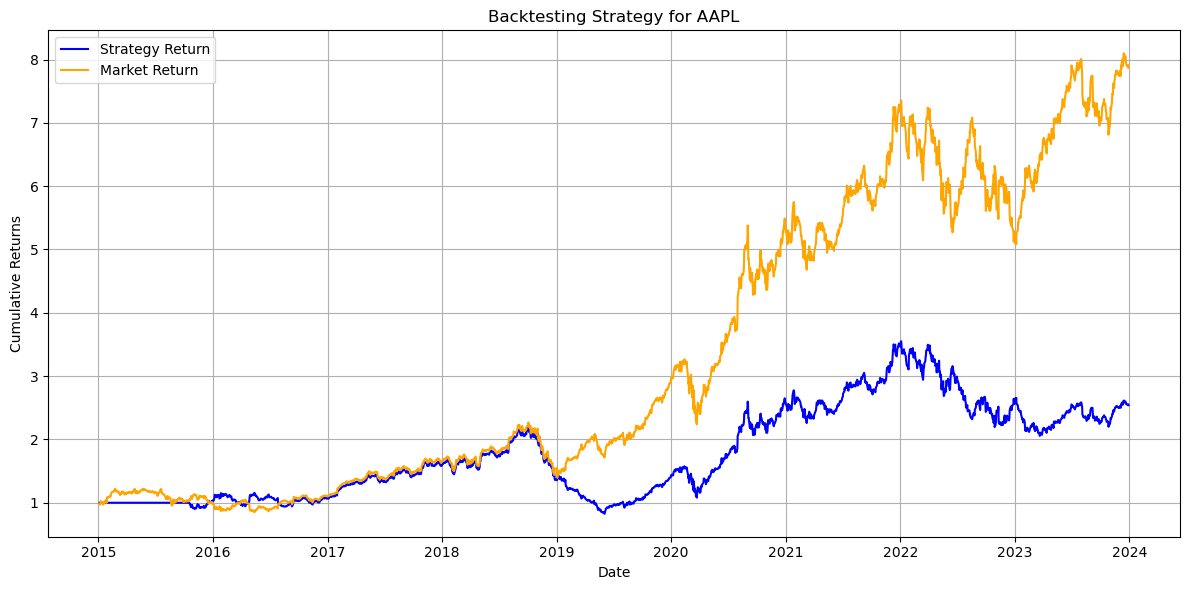

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download historical stock data
ticker = "AAPL"  # Replace with the stock ticker you want to analyze
data = yf.download(ticker, start="2015-01-01", end="2023-12-31")

# Step 2: Calculate Moving Averages
data['SMA_50'] = data['Adj Close'].rolling(window=50).mean()  # 50-day SMA
data['SMA_200'] = data['Adj Close'].rolling(window=200).mean()  # 200-day SMA

# Step 3: Generate Trading Signals
# Signal = 1 (buy) when SMA_50 > SMA_200
# Signal = -1 (sell) when SMA_50 <= SMA_200
data['Signal'] = 0
data.loc[data['SMA_50'] > data['SMA_200'], 'Signal'] = 1  # Buy signal
data.loc[data['SMA_50'] <= data['SMA_200'], 'Signal'] = -1  # Sell signal

# Step 4: Backtest Strategy
# Calculate daily returns
data['Daily Return'] = data['Adj Close'].pct_change()

# Apply strategy: Multiply daily returns by the previous day's signal
data['Strategy Return'] = data['Daily Return'] * data['Signal'].shift(1)

# Step 5: Calculate Cumulative Returns
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod()
data['Cumulative Market Return'] = (1 + data['Daily Return']).cumprod()

# Step 6: Visualize the Results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Cumulative Strategy Return'], label="Strategy Return", color="blue")
plt.plot(data.index, data['Cumulative Market Return'], label="Market Return", color="orange")
plt.title(f"Backtesting Strategy for {ticker}")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
'''''
Analysis of the Plot:

1) Strategy Return (Blue Line):

- This line shows the cumulative returns generated by applying the trading strategy based on the moving average crossover.
- The performance is steady but does not match the market's peaks, which is expected for a simple moving average-based strategy.

2) Market Return (Orange Line):

- This line represents the cumulative returns if you had simply held the stock during the period.
- It reflects the actual market performance of AAPL, including its significant growth from 2020 onward.

Insights:

- The strategy performs reasonably well during certain periods (e.g., 2015–2017), but it significantly underperforms the market 
during major bullish trends (e.g., 2020–2021).
- This behavior highlights the limitations of moving average-based strategies during trending markets but their potential in 
reducing risk during market downturns.

'''''
